## Extracting reviews for realme 9 Pro 5G (Sunrise Blue, 128 GB) from ecommerce website flipkart

In [1]:
from bs4 import BeautifulSoup as bs
import requests
import re
import spacy

In [2]:
link='https://www.flipkart.com/realme-9-pro-5g-sunrise-blue-128-gb/product-reviews/itmce357e4a0ca24?pid=MOBGB4ZYBXE6EQ2D&lid=LSTMOBGB4ZYBXE6EQ2D9UTW3F&marketplace=FLIPKART'

In [3]:
page=requests.get(link)

In [4]:
page

<Response [200]>

In [5]:
page.content

b'<!doctype html><html lang="en"><head><link href="https://rukminim1.flixcart.com" rel="preconnect"/><link rel="stylesheet" href="//static-assets-web.flixcart.com/www/linchpin/fk-cp-zion/css/app_modules.chunk.94b5e7.css"/><link rel="stylesheet" href="//static-assets-web.flixcart.com/www/linchpin/fk-cp-zion/css/app.chunk.6c22a8.css"/><meta http-equiv="Content-type" content="text/html; charset=utf-8"/><meta http-equiv="X-UA-Compatible" content="IE=Edge"/><meta property="fb:page_id" content="102988293558"/><meta property="fb:admins" content="658873552,624500995,100000233612389"/><meta name="robots" content="noodp"/><link rel="shortcut icon" href="https://static-assets-web.flixcart.com/www/promos/new/20150528-140547-favicon-retina.ico"/><link type="application/opensearchdescription+xml" rel="search" href="/osdd.xml?v=2"/><meta property="og:type" content="website"/><meta name="og_site_name" property="og:site_name" content="Flipkart.com"/><link rel="apple-touch-icon" sizes="57x57" href="/app

In [6]:
soup=bs(page.content,"html.parser")

In [7]:
print(soup.prettify())

<!DOCTYPE html>
<html lang="en">
 <head>
  <link href="https://rukminim1.flixcart.com" rel="preconnect"/>
  <link href="//static-assets-web.flixcart.com/www/linchpin/fk-cp-zion/css/app_modules.chunk.94b5e7.css" rel="stylesheet"/>
  <link href="//static-assets-web.flixcart.com/www/linchpin/fk-cp-zion/css/app.chunk.6c22a8.css" rel="stylesheet"/>
  <meta content="text/html; charset=utf-8" http-equiv="Content-type"/>
  <meta content="IE=Edge" http-equiv="X-UA-Compatible"/>
  <meta content="102988293558" property="fb:page_id"/>
  <meta content="658873552,624500995,100000233612389" property="fb:admins"/>
  <meta content="noodp" name="robots"/>
  <link href="https://static-assets-web.flixcart.com/www/promos/new/20150528-140547-favicon-retina.ico" rel="shortcut icon"/>
  <link href="/osdd.xml?v=2" rel="search" type="application/opensearchdescription+xml"/>
  <meta content="website" property="og:type"/>
  <meta content="Flipkart.com" name="og_site_name" property="og:site_name"/>
  <link href="/

In [8]:
#Review title
names=soup.find_all("p",class_='_2-N8zT')

In [9]:
len(names)

10

In [10]:
names

[<p class="_2-N8zT">Fabulous!</p>,
 <p class="_2-N8zT">Highly recommended</p>,
 <p class="_2-N8zT">Worth the money</p>,
 <p class="_2-N8zT">Excellent</p>,
 <p class="_2-N8zT">Excellent</p>,
 <p class="_2-N8zT">Just wow!</p>,
 <p class="_2-N8zT">Wonderful</p>,
 <p class="_2-N8zT">Great product</p>,
 <p class="_2-N8zT">Very Good</p>,
 <p class="_2-N8zT">Best in the market!</p>]

In [11]:
r_names=[]
for i in range(len(names)):
    r_names.append(names[i].get_text())

In [12]:
r_names

['Fabulous!',
 'Highly recommended',
 'Worth the money',
 'Excellent',
 'Excellent',
 'Just wow!',
 'Wonderful',
 'Great product',
 'Very Good',
 'Best in the market!']

In [13]:
#Reviews
review=soup.find_all("div",class_='t-ZTKy')

In [14]:
review

[<div class="t-ZTKy"><div><div class="">I am not here to review about phone as I know it is very good but why I am here is that I like the service of Flipkart and it matters me alot. I am a regular customer of Flipkart and in some orders I faced the problem but they did deal with it and they provided solution. The customer support is always supportive and main thing is about delivery. They always deliver the product before their estimated time and which is good. I trust Flipkart and now it is getting high. Thanks Flipkart 😊😊😊😊</div><span class="_1H-bmy"><span>READ MORE</span></span></div></div>,
 <div class="t-ZTKy"><div><div class="">phone is great And the company delivered me before time The phone is very good for the money, the camera quality, the battery backup is all perfect<br/>This is what I would suggest to everyone that this phone is worth getting i love this phone</div><span class="_1H-bmy"><span>READ MORE</span></span></div></div>,
 <div class="t-ZTKy"><div><div class="">Val

In [15]:
reviews=[]
for i in range(len(review)):
    reviews.append(review[i].get_text())

In [16]:
len(reviews)

10

In [17]:
import pandas as pd

In [18]:
df=pd.DataFrame()

In [19]:
df['Review Title']=r_names

In [20]:
df['Reviews']=reviews

In [21]:
df

,Review Title,Reviews
0,Fabulous!,I am not here to review about phone as I know ...
1,Highly recommended,phone is great And the company delivered me be...
2,Worth the money,Value for money phone. Camera details are good...
3,Excellent,THE BEST SMART PHONE U CAN AFFORD WITH ANDROID...
4,Excellent,Camera is not upto the mark but more than dece...
5,Just wow!,1.Battery Performance Good...2.LCD Good But No...
6,Wonderful,Writing after 1 week..I am very techy consumer...
7,Great product,"Over all Good Phone at this Price , realme bra..."
8,Very Good,The display of the phone is okk because it is ...
9,Best in the market!,Camera is very nice and battery is over power...


In [22]:
df = [Text.strip() for Text in df["Reviews"]] # remove both the leading and the trailing characters
df = [Text for Text in df if Text] # removes empty strings, because they are considered in Python as False
df

['I am not here to review about phone as I know it is very good but why I am here is that I like the service of Flipkart and it matters me alot. I am a regular customer of Flipkart and in some orders I faced the problem but they did deal with it and they provided solution. The customer support is always supportive and main thing is about delivery. They always deliver the product before their estimated time and which is good. I trust Flipkart and now it is getting high. Thanks Flipkart 😊😊😊😊READ MORE',
 'phone is great And the company delivered me before time The phone is very good for the money, the camera quality, the battery backup is all perfectThis is what I would suggest to everyone that this phone is worth getting i love this phoneREAD MORE',
 'Value for money phone. Camera details are good enough for the price but photos seems to be on bit saturated side. Performance is very goodREAD MORE',
 'THE BEST SMART PHONE U CAN AFFORD WITH ANDROID 12 . WITH 3RD UI VERSIONCAMERA QUALITY IS

In [23]:
text = ' '.join(df)
text

'I am not here to review about phone as I know it is very good but why I am here is that I like the service of Flipkart and it matters me alot. I am a regular customer of Flipkart and in some orders I faced the problem but they did deal with it and they provided solution. The customer support is always supportive and main thing is about delivery. They always deliver the product before their estimated time and which is good. I trust Flipkart and now it is getting high. Thanks Flipkart 😊😊😊😊READ MORE phone is great And the company delivered me before time The phone is very good for the money, the camera quality, the battery backup is all perfectThis is what I would suggest to everyone that this phone is worth getting i love this phoneREAD MORE Value for money phone. Camera details are good enough for the price but photos seems to be on bit saturated side. Performance is very goodREAD MORE THE BEST SMART PHONE U CAN AFFORD WITH ANDROID 12 . WITH 3RD UI VERSIONCAMERA QUALITY IS AWESOME BATT

In [24]:
#tokenizing and normalizing
def tokenize(txt):
    tokens=re.split('\W+',txt)
    return tokens
tokens=tokenize(text.lower())
tokens[:10]

['i', 'am', 'not', 'here', 'to', 'review', 'about', 'phone', 'as', 'i']

In [25]:
#removing the stop words
import nltk
stopwords=nltk.corpus.stopwords.words("english")
stopwords[0:10]

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

In [26]:
def remove_stpwords(txt):
    words=[word for word in txt if word not in stopwords]
    return words
words=remove_stpwords(tokens)
print(words[0:10])

['review', 'phone', 'know', 'good', 'like', 'service', 'flipkart', 'matters', 'alot', 'regular']


In [27]:
#Stemming
from nltk.stem import PorterStemmer
ps = PorterStemmer()

def stemm(tokens):
    stemmed_tokens = [ps.stem(word) for word in tokens]
    return stemmed_tokens
words=stemm(words)
print(words[0:10])

['review', 'phone', 'know', 'good', 'like', 'servic', 'flipkart', 'matter', 'alot', 'regular']


In [28]:
nlp = spacy.load('en_core_web_sm') 
doc = nlp(' '.join(words))
print(doc[0:40])

review phone know good like servic flipkart matter alot regular custom flipkart order face problem deal provid solut custom support alway support main thing deliveri alway deliv product estim time good trust flipkart get high thank flipkart read phone great


In [29]:
lemmas = [token.lemma_ for token in doc]
print(lemmas[0:25])

['review', 'phone', 'know', 'good', 'like', 'servic', 'flipkart', 'matter', 'alot', 'regular', 'custom', 'flipkart', 'order', 'face', 'problem', 'deal', 'provid', 'solut', 'custom', 'support', 'alway', 'support', 'main', 'thing', 'deliveri']


In [30]:
text=" ".join(lemmas)

In [31]:
text

'review phone know good like servic flipkart matter alot regular custom flipkart order face problem deal provid solut custom support alway support main thing deliveri alway deliv product estim time good trust flipkart get high thank flipkart read phone great compani deliv time phone good money camera qualiti batteri backup perfectthi would suggest everyon phone worth get love phoneread valu money phone camera detail good enough price photo seem bit satur side perform goodread good smart phone u afford android 12 3rd ui versioncamera qualiti awesom batteri realli goodth touch respon excel good price segment read camera upto mark decent batteri charg back good realm ui 3 0 great lot customis physic overview also nice great design over great phone 16k use card discount read 1 batteri perform good 2 lcd good compar amol prize rang display good bright heavi full level enabl time 3 camera good night time flash reflect time imag colour diff plz check fulli street light full lead lamp enabl ar

In [32]:
import matplotlib.pyplot as plt
%matplotlib inline
from wordcloud import WordCloud, STOPWORDS
# Define a function to plot word cloud
def plot_cloud(wordcloud):
    # Set figure size
    plt.figure(figsize=(40, 30))
    # Display image
    plt.imshow(wordcloud) 
    # No axis details
    plt.axis("off");

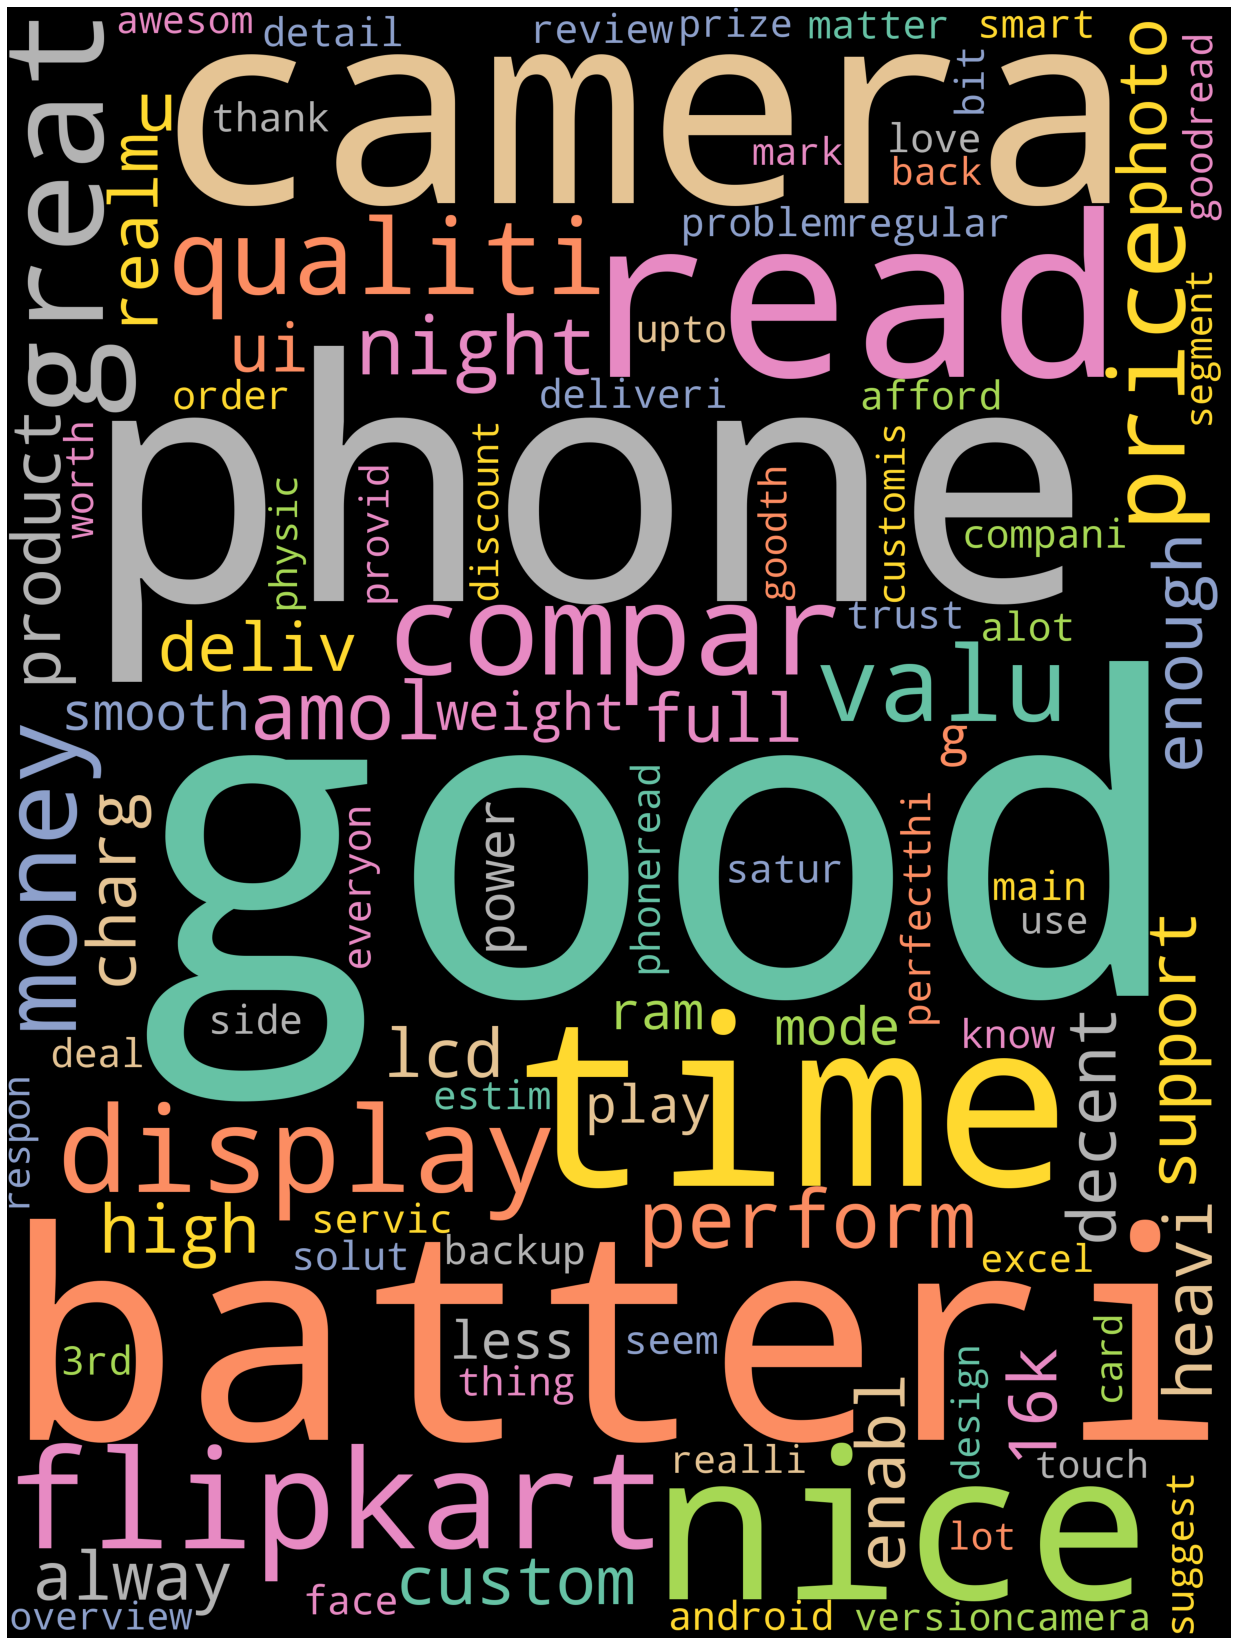

In [33]:
# Generate wordcloud
stopwords = STOPWORDS
stopwords.add('will')
wordcloud = WordCloud(width = 3000, height = 4000, background_color='black', max_words=100,colormap='Set2',stopwords=stopwords).generate(text)
# Plot
plot_cloud(wordcloud)

In [34]:
with open("positive-words.txt","r") as pw:
    pwds = pw.read().split("\n")
pwds = pwds[35:]


In [35]:
with open("negative-words.txt","r", encoding='latin-1') as nw:
    nwds = nw.read().split("\n")
nwds = nwds[35:]


In [36]:
pos_text = ' '.join([word for word in lemmas if word in pwds])
wc_pos = WordCloud(background_color='black',width=1800,height=1400).generate(pos_text)

In [37]:
neg_text = ' '.join([word for word in lemmas if word in nwds])
wc_neg = WordCloud(background_color='black',width=1800,height=1400).generate(neg_text)

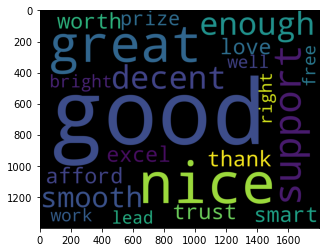

In [38]:
plt.imshow(wc_pos)

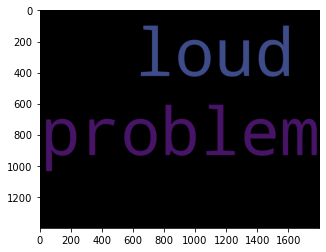

In [39]:
plt.imshow(wc_neg)